#### GA Runtime

In [5]:
import time
from genetic_algorithm1 import GeneticAlgorithm
from input_data import input_data
 
def run_comparative_analysis(ga, max_generations):
    # Initialize results containers
    ga_fitnesses = []

    # Timing GA
    start_time_ga = time.time()
    ga_best_solution, ga_fitness_history, convergence_generation = ga.run(max_generations)
    ga_time = time.time() - start_time_ga

    # Record fitness results
    ga_fitnesses.append(ga_fitness_history)

    print(f"GA best fitness: {ga_fitness_history[-1]}, Time: {ga_time:.2f}s")
    print(len(ga_fitness_history))

    return ga_fitnesses, ga_time

max_generations = 500
ga_instance = GeneticAlgorithm(input_data, pop_size=50, mutation_rate=0.5)
ga_fitnesses, ga_time = run_comparative_analysis(ga_instance, max_generations)


Best solution for generation 1 has a fitness of: 16, Diversity: 67.17387755102041
Best solution for generation 2 has a fitness of: 16, Diversity: 63.822857142857146
Best solution for generation 3 has a fitness of: 17, Diversity: 61.61551020408163
Best solution for generation 4 has a fitness of: 19, Diversity: 60.46367346938776
Best solution for generation 5 has a fitness of: 19, Diversity: 61.39020408163265
Best solution for generation 6 has a fitness of: 21, Diversity: 58.798367346938775
Best solution for generation 7 has a fitness of: 20, Diversity: 58.73795918367347
Best solution for generation 8 has a fitness of: 17, Diversity: 58.751836734693875
Best solution for generation 9 has a fitness of: 19, Diversity: 58.626938775510204
Best solution for generation 10 has a fitness of: 20, Diversity: 57.63428571428572
Best solution for generation 11 has a fitness of: 21, Diversity: 57.200816326530614
Best solution for generation 12 has a fitness of: 20, Diversity: 58.61632653061225
Best sol

#### DE Runtime

In [6]:
import time
from differential_evolution import DifferentialEvolution
from input_data import input_data
 
def run_comparative_analysis(de, max_generations):
    # Initialize results containers
    de_fitnesses = []
    
    # Timing DE
    start_time_de = time.time()
    de_best_solution, de_fitness_history = de.run(max_generations)
    de_time = time.time() - start_time_de

    # Record fitness results
    de_fitnesses.append(de_fitness_history)

    print(f"DE best fitness: {de_fitness_history[-1]}, Time: {de_time:.2f}s")
    print(len(de_fitness_history))

    return de_fitnesses, de_time

# Assuming both GA and DE have `run()` method implemented
max_generations = 500
de_instance = DifferentialEvolution(input_data, pop_size=50, F=0.5, CR=0.6)
de_fitnesses, de_time = run_comparative_analysis(de_instance, max_generations)


Best solution for generation 1/200 has a fitness of: 15, Diversity: 69.2326530612245
Best solution for generation 2/200 has a fitness of: 14, Diversity: 68.88897959183673
Best solution for generation 3/200 has a fitness of: 12, Diversity: 68.26285714285714
Best solution for generation 4/200 has a fitness of: 12, Diversity: 67.98857142857143
Best solution for generation 5/200 has a fitness of: 12, Diversity: 67.75102040816327
Best solution for generation 6/200 has a fitness of: 12, Diversity: 67.63673469387756
Best solution for generation 7/200 has a fitness of: 12, Diversity: 67.31673469387755
Best solution for generation 8/200 has a fitness of: 12, Diversity: 67.23510204081633
Best solution for generation 9/200 has a fitness of: 11, Diversity: 67.20326530612245
Best solution for generation 10/200 has a fitness of: 11, Diversity: 66.95020408163265
Best solution for generation 11/200 has a fitness of: 10, Diversity: 66.76653061224489
Best solution for generation 12/200 has a fitness of:

#### GA vs DE Fitness Progression

In [ ]:
import matplotlib.pyplot as plt 

def plot_fitness_comparison(ga_fitnesses, de_fitnesses):
    generations = range(len(ga_fitnesses))
    
    plt.plot(generations, ga_fitnesses, label="GA Fitness")
    plt.plot(generations, de_fitnesses, label="DE Fitness")

    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.title("GA vs DE Fitness Progress")

    # Add parameters as text annotations or inside the title
    ga_param_str = f"GA Params: {500}"
    de_param_str = f"DE Params: {500}"
    
    # You can add this to the plot using `text` or `plt.figtext`
    plt.figtext(0.99, 0.01, ga_param_str + " | " + de_param_str, horizontalalignment='right')

    plt.legend()
    plt.show()

plot_fitness_comparison(ga_fitnesses[-1], de_fitnesses[-1])

In [ ]:
import matplotlib.pyplot as plt

def plot_fitness_comparison(ga_fitnesses, de_fitnesses, ga_params, de_params):
    generations = range(len(ga_fitnesses))

    # Plot the fitness comparison
    plt.plot(generations, ga_fitnesses, label="GA Fitness")
    plt.plot(generations, de_fitnesses, label="DE Fitness")
    
    # Label axes
    plt.xlabel("Generations")
    plt.ylabel("Fitness")
    plt.title("GA vs DE Fitness Progress")
    
    # Create parameter strings
    ga_param_str = '\n'.join([f"GA {key}: {value}" for key, value in ga_params.items()])
    de_param_str = '\n'.join([f"DE {key}: {value}" for key, value in de_params.items()])
    
    # Combine GA and DE parameter strings
    param_text = f"{ga_param_str}\n\n{de_param_str}"
    
    # Add text box with parameters
    plt.text(0.95, 0.05, param_text, fontsize=10, verticalalignment='bottom', 
             horizontalalignment='right', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))

    # Show legend and plot
    plt.legend()
    plt.show()

# Example usage with parameters
ga_fitnesses = ga_fitnesses[-1]  # Assuming last fitness history from GA
de_fitnesses = de_fitnesses[-1]  # Assuming last fitness history from DE

ga_params = {'pop_size': 50, 'mutation_rate': 0.1, 'crossover_rate': 0.8, 'elitism': 2}
de_params = {'pop_size': 50, 'F': 0.5, 'CR': 0.8, 'mutation_strategy': 'rand/1/bin'}

plot_fitness_comparison(ga_fitnesses, de_fitnesses, ga_params, de_params)


#### Parameter Tuning for DE

In [6]:
import random
import numpy as np
import pandas as pd
from differential_evolution import DifferentialEvolution
from input_data import input_data


de_params = {
    # "pop_size": [50, 200],
    "F": [0.4, 1.0],
    "CR": [0.5, 1.0]
}

# Random search for DE
def random_search_de():
    random_de_settings = {
        # "pop_size": random.randint(de_params["pop_size"][0], de_params["pop_size"][1]),
        "F": random.uniform(de_params["F"][0], de_params["F"][1]),
        "CR": random.uniform(de_params["CR"][0], de_params["CR"][1])
    }
    return random_de_settings

results = []
num_iterations = 20
max_generations = 150
pop_size = 50


# Example: Perform random search for 20 iterations
for i in range(num_iterations):
    settings = random_search_de()

    # Run your GA and DE algorithms with these random parameters
    # Example: run_ga(ga_settings), run_de(de_settings)
    de = DifferentialEvolution(input_data, pop_size, settings["F"], settings["CR"])
    _, fitness_history, convergence_speed, diversity_history = de.run(max_generations)

    metrics = {
        'best_fitness': fitness_history[-1],
        'convergence_speed': convergence_speed,
        'std(diversity)': np.std(diversity_history)
    }
    results.append({
        'params': settings,
        'metrics': metrics
    })

df = pd.DataFrame(results)

df = pd.concat([df.drop(['params', 'metrics'], axis=1), df['params'].apply(pd.Series), df['metrics'].apply(pd.Series)], axis=1)

print(df)
    

           F        CR  best_fitness  convergence_speed  std(diversity)
0   0.872020  0.909987           1.0              149.0        9.787704
1   0.975786  0.692333           3.0              149.0        2.853836
2   0.807591  0.880030           0.0              114.0        8.198562
3   0.775586  0.965371           0.0               68.0        9.617688
4   0.998859  0.740774           3.0              149.0        3.756282
5   0.677618  0.964261           1.0              149.0        8.831422
6   0.855317  0.675970           3.0              149.0        3.987886
7   0.930919  0.707747           3.0              149.0        3.635008
8   0.402785  0.908229           0.0              141.0        8.589447
9   0.627621  0.783914           2.0              149.0        5.436181
10  0.873739  0.577730           4.0              149.0        2.434763
11  0.823495  0.596518           3.0              149.0        3.170599
12  0.418042  0.518223           2.0              149.0        3

#### Parameter Tuning for GA

In [5]:
import random
import numpy as np
import pandas as pd
from genetic_algorithm1 import GeneticAlgorithm
from input_data import input_data

ga_params = {
    # "pop_size": [50, 200],
    "mutation_rate": [0.01, 0.8]
}

# Random search for GA
def random_search_ga():
    random_ga_settings = {
        # "pop_size": random.randint(ga_params["pop_size"][0], ga_params["pop_size"][1]),
        "mutation_rate": random.uniform(ga_params["mutation_rate"][0], ga_params["mutation_rate"][1])
    }
    return random_ga_settings


results = []
num_iterations = 20
max_generations = 150
pop_size = 50


# Example: Perform random search for 20 iterations
for i in range(num_iterations):
    settings = random_search_ga()

    # Run your GA and DE algorithms with these random parameters
    # Example: run_ga(ga_settings), run_de(de_settings)
    ga = GeneticAlgorithm(input_data, pop_size, settings["mutation_rate"])
    _, fitness_history, convergence_speed, diversity_history = ga.run(max_generations)

    metrics = {
        'best_fitness': fitness_history[-1],
        'convergence_speed': convergence_speed,
        'std(diversity)': np.std(diversity_history)
    }
    results.append({
        'params': settings,
        'metrics': metrics
    })

df = pd.DataFrame(results)

df = pd.concat([df.drop(['params', 'metrics'], axis=1), df['params'].apply(pd.Series), df['metrics'].apply(pd.Series)], axis=1)

print(df)
    

    mutation_rate  best_fitness  convergence_speed  std(diversity)
0        0.771534           2.0              149.0       10.860440
1        0.202481           2.0              149.0       10.820957
2        0.398521           2.0              149.0       11.680860
3        0.755103           2.0              149.0       11.589047
4        0.767224           0.0              125.0       12.191594
5        0.029287           8.0              149.0       13.452015
6        0.253225           0.0              133.0       13.544659
7        0.412371           2.0              149.0       13.405394
8        0.462479           0.0              131.0       14.098524
9        0.421073           0.0              145.0       13.437460
10       0.441102           1.0              149.0       14.142301
11       0.156085           6.0              149.0       15.417315
12       0.521463           4.0              149.0       14.715350
13       0.686766           1.0              149.0       12.77

### GA Consistency

###### Average Best Fitness: The closer this is to the optimal fitness, the better the algorithm performs on average.
###### Standard Deviation of Best Fitness: A low value means the algorithm consistently finds good solutions, while a high value means that some runs are much better or worse than others.

In [ ]:
from genetic_algorithm1 import GeneticAlgorithm
from input_data import input_data
import numpy as np
import matplotlib.pyplot as plt

def measure_consistency(num_runs, max_generations):
    best_fitnesses = []
    
    for run in range(num_runs):
        seed = run*4 # Different seed for each run
        _, fitness_history, generation = ga.run(seed, max_generations)
        
        best_fitness = min(fitness_history)
        print(f"Run {run+1}, Last generation: {generation+1}, Best fitness: {best_fitness}")
        
        best_fitnesses.append(best_fitness)
    
    # Calculate the average and standard deviation
    avg_best_fitness = np.mean(best_fitnesses)
    std_best_fitness = np.std(best_fitnesses)

    # Example boxplot for best fitness values
    plt.boxplot(best_fitnesses)
    plt.title("Best Fitness Across Multiple Runs")
    plt.xlabel("Runs")
    plt.ylabel("Best Fitness")
    plt.show()

    # Example histogram for best fitness values
    plt.hist(best_fitnesses, bins=10, edgecolor='black')
    plt.title("Distribution of Best Fitness Across Runs")
    plt.xlabel("Best Fitness")
    plt.ylabel("Frequency")
    plt.show()
    
    return avg_best_fitness, std_best_fitness

ga = GeneticAlgorithm(input_data, pop_size=50, mutation_rate=0.5)

num_runs = 20
max_generations = 100

average, standard_deviation = measure_consistency(num_runs, max_generations)

print(f"Average Best Fitness: {average:.4f}")
print(f"Standard Deviation of Best Fitness: {standard_deviation:.4f}")



### DE Consistency

In [3]:
from differential_evolution import DifferentialEvolution
from input_data import input_data
import numpy as np
import matplotlib.pyplot as plt

def measure_consistency(num_runs, max_generations):
    best_fitnesses = []
    
    for run in range(num_runs):
        seed = run*4 # Different seed for each run
        _, fitness_history, generation = de.run(seed, max_generations)
        
        best_fitness = min(fitness_history)
        print(f"Run {run+1}, Last generation: {generation+1}, Best fitness: {best_fitness}")
        
        best_fitnesses.append(best_fitness)
    
    # Calculate the average and standard deviation
    avg_best_fitness = np.mean(best_fitnesses)
    std_best_fitness = np.std(best_fitnesses)


    # Example boxplot for best fitness values
    plt.boxplot(best_fitnesses)
    plt.title("Best Fitness Across Multiple Runs")
    plt.ylabel("Best Fitness")
    plt.show()

    # Example histogram for best fitness values
    plt.hist(best_fitnesses, bins=10, edgecolor='black')
    plt.title("Distribution of Best Fitness Across Runs")
    plt.xlabel("Best Fitness")
    plt.ylabel("Frequency")
    plt.show()
        
    return avg_best_fitness, std_best_fitness

de = DifferentialEvolution(input_data, pop_size=50, F=0.5, CR=0.6)

num_runs = 20
max_generations = 100

average, standard_deviation = measure_consistency(num_runs, max_generations)

print(f"Average Best Fitness: {average:.4f}")
print(f"Standard Deviation of Best Fitness: {standard_deviation:.4f}")


Run 1, Last generation: 100, Best fitness: 2
Run 2, Last generation: 96, Best fitness: 0
Run 3, Last generation: 1, Best fitness: 0
Run 4, Last generation: 1, Best fitness: 0
Run 5, Last generation: 1, Best fitness: 0
Run 6, Last generation: 1, Best fitness: 0
Run 7, Last generation: 1, Best fitness: 0
Run 8, Last generation: 1, Best fitness: 0
Run 9, Last generation: 1, Best fitness: 0
Run 10, Last generation: 1, Best fitness: 0
Run 11, Last generation: 1, Best fitness: 0
Run 12, Last generation: 1, Best fitness: 0
Run 13, Last generation: 1, Best fitness: 0
Run 14, Last generation: 1, Best fitness: 0
Run 15, Last generation: 1, Best fitness: 0
Run 16, Last generation: 1, Best fitness: 0
Run 17, Last generation: 1, Best fitness: 0
Run 18, Last generation: 1, Best fitness: 0
Run 19, Last generation: 1, Best fitness: 0
Run 20, Last generation: 1, Best fitness: 0
Average Best Fitness: 0.1000
Standard Deviation of Best Fitness: 0.4359


#### EXPERIMENTS

To compare both algorithms, the following performance metrics will be used: Solution quality/Fitness, Convergence speed, Std of diversity (to show how well the algorithm was able to maintain diversity), Consistency (in the quality of solutions generated over multiple runs), Time, Results. 
This would be run over 10 experiments, and a table of parameters and metrics will be returned. As well as graphs for each metric.

#### Genetic Algorithm Experiment

In [4]:
import random
import numpy as np
import pandas as pd
from genetic_algorithm1 import GeneticAlgorithm
from input_data import input_data
import time

ga_params = {
    "mutation_rate": 0.7
}

results = []
num_runs = 10
max_generations = 150
pop_size = 50


for i in range(num_runs):

    ga = GeneticAlgorithm(input_data, pop_size, ga_params["mutation_rate"])
    start_time_ga = time.time()
    _, fitness_history, convergence_speed, diversity_history = ga.run(max_generations)
    ga_time = time.time() - start_time_ga

    metrics = {
        'solution_fitness': fitness_history[-1],
        'convergence_speed': convergence_speed,
        'std(diversity)': np.std(diversity_history),
        'Runtime': f"{ga_time:.2f}"
    }
    results.append({
        'params': ga_params,
        'metrics': metrics
    })

df = pd.DataFrame(results)

df = pd.concat([df.drop(['params', 'metrics'], axis=1), df['params'].apply(pd.Series), df['metrics'].apply(pd.Series)], axis=1)
df.index = df.index + 1
df.index.name = 'S/N'

print(df)
    

     mutation_rate  solution_fitness  convergence_speed  std(diversity)  \
S/N                                                                       
1              0.7                 2                149       11.741175   
2              0.7                 1                149       10.058964   
3              0.7                 1                149       12.178834   
4              0.7                 2                149       12.506730   
5              0.7                 0                141       12.715250   
6              0.7                 2                149       15.929193   
7              0.7                 2                149       13.065134   
8              0.7                 0                119       13.381357   
9              0.7                 1                149       10.233776   
10             0.7                 0                131        8.551389   

    Runtime  
S/N          
1      4.84  
2      5.77  
3      7.44  
4     13.08  
5     15.57  
6

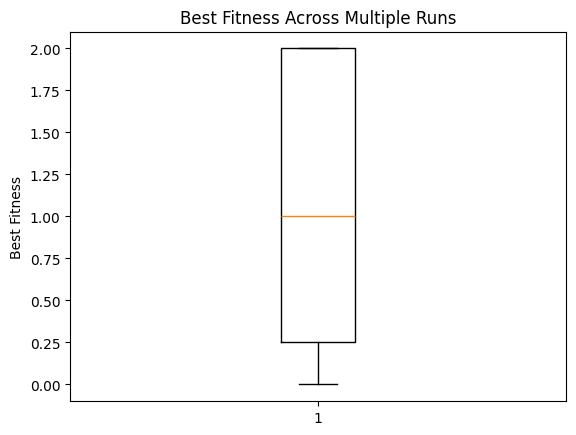

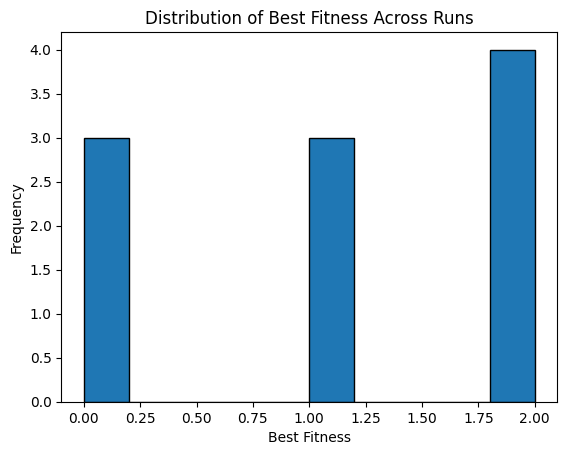

Average Best Fitness: 1.1000
Standard Deviation of Best Fitness: 0.8307


In [9]:
import numpy as np
import matplotlib.pyplot as plt

best_fitness = [result['metrics']['solution_fitness'] for result in results]

# Calculate the average and standard deviation
avg_best_fitness = np.mean(best_fitness)
std_best_fitness = np.std(best_fitness)


# Example boxplot for best fitness values
plt.boxplot(best_fitness)
plt.title("Best Fitness Across Multiple Runs")
plt.ylabel("Best Fitness")
plt.show()

# Example histogram for best fitness values
plt.hist(best_fitness, bins=10, edgecolor='black')
plt.title("Distribution of Best Fitness Across Runs")
plt.xlabel("Best Fitness")
plt.ylabel("Frequency")
plt.show()

print(f"Average Best Fitness: {avg_best_fitness:.4f}")
print(f"Standard Deviation of Best Fitness: {std_best_fitness:.4f}")

#### Differential Evolution Experiment

In [18]:
import random
import numpy as np
import pandas as pd
from differential_evolution import DifferentialEvolution
from input_data import input_data
import time


de_params = {
    "F": 0.55,
    "CR": 0.95
}

results = []
num_iterations = 10
max_generations = 150
pop_size = 50


for i in range(num_iterations):

    de = DifferentialEvolution(input_data, pop_size, de_params["F"], de_params["CR"])
    start_time_de = time.time()
    _, fitness_history, convergence_speed, diversity_history = de.run(max_generations)
    de_time = time.time() - start_time_de

    metrics = {
        'best_fitness': fitness_history[-1],
        'convergence_speed': convergence_speed,
        'std(diversity)': np.std(diversity_history),
        'Runtime': f"{de_time:.2f}"
    }
    results.append({
        'params': de_params,
        'metrics': metrics
    })

df = pd.DataFrame(results)

df = pd.concat([df.drop(['params', 'metrics'], axis=1), df['params'].apply(pd.Series), df['metrics'].apply(pd.Series)], axis=1)
df.index = df.index + 1
df.index.name = 'S/N'

print(df)

        F    CR  best_fitness  convergence_speed  std(diversity) Runtime
S/N                                                                     
1    0.55  0.95             1                149       16.438779   11.53
2    0.55  0.95             0                 88        7.581267   14.95
3    0.55  0.95             0                 93        8.186043   18.61
4    0.55  0.95             1                149       14.367043   10.64
5    0.55  0.95             0                 91       11.023689    5.49
6    0.55  0.95             0                 87       10.389758    5.22
7    0.55  0.95             1                149        9.969470    9.01
8    0.55  0.95             0                 88        7.716429    5.75
9    0.55  0.95             1                149       10.838242    9.30
10   0.55  0.95             0                 71        7.681499    4.39


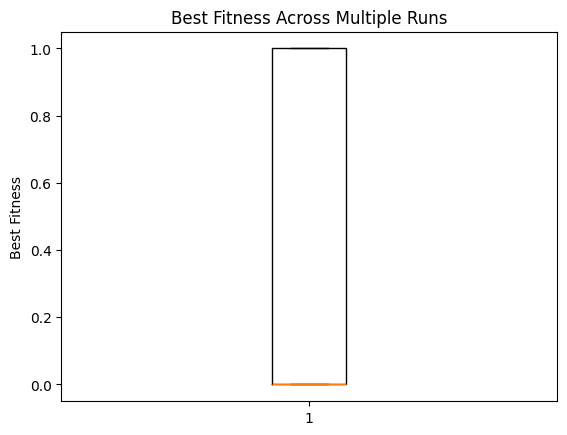

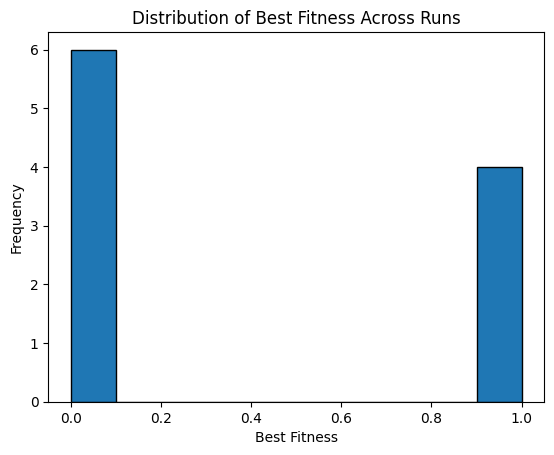

Average Best Fitness: 0.4000
Standard Deviation of Best Fitness: 0.4899


In [16]:
import numpy as np
import matplotlib.pyplot as plt

best_fitness = [result['metrics']['best_fitness'] for result in results]

# Calculate the average and standard deviation
avg_best_fitness = np.mean(best_fitness)
std_best_fitness = np.std(best_fitness)


# Example boxplot for best fitness values
plt.boxplot(best_fitness)
plt.title("Best Fitness Across Multiple Runs")
plt.ylabel("Best Fitness")
plt.show()

# Example histogram for best fitness values
plt.hist(best_fitness, bins=10, edgecolor='black')
plt.title("Distribution of Best Fitness Across Runs")
plt.xlabel("Best Fitness")
plt.ylabel("Frequency")
plt.show()

print(f"Average Best Fitness: {avg_best_fitness:.4f}")
print(f"Standard Deviation of Best Fitness: {std_best_fitness:.4f}")